# 7. Identifying Drivers of Outcomes: Linear Models

A common
application in survey analysis is to model satisfaction with a product in relation
to specific elements of the product and its delivery; this is called “satisfaction drivers
analysis.” Linear models are also used to understand how price and advertising are
related to sales, and this is called “marketing mix modeling.” 
 - There are many other situations in which it is helpful to model an outcome, known formally as a *response or dependent variable*, as a function of predictor variables (also known as *explanatory or independent variables*).

An important thing to understand is that driver does not imply causation. A linear
model only assumes an association among variables. Consider a survey of automobile
purchasers that finds a positive association between satisfaction and price
paid.

We encourage readers who are
unfamiliar with linear modeling to supplement this chapter with a review of ***linear
modeling*** in a statistics or marketing research textbook, where it might appear under
a name such as ***regression analysis, linear regression, or least-squares fitting.***

## 7.1 Amusement Park Data

In [20]:
sat.df = read.csv('http://goo.gl/HKnl74')
str(sat.df)                  

'data.frame':	500 obs. of  8 variables:
 $ weekend  : Factor w/ 2 levels "no","yes": 2 2 1 2 1 1 2 1 1 2 ...
 $ num.child: int  0 2 1 0 4 5 1 0 0 3 ...
 $ distance : num  114.6 27 63.3 25.9 54.7 ...
 $ rides    : int  87 87 85 88 84 81 77 82 90 88 ...
 $ games    : int  73 78 80 72 87 79 73 70 88 86 ...
 $ wait     : int  60 76 70 66 74 48 58 70 79 55 ...
 $ clean    : int  89 87 88 89 87 79 85 83 95 88 ...
 $ overall  : int  47 65 61 37 68 27 40 30 58 36 ...


> This data set comprises a few objective measures: whether the
respondent visited on a weekend (which will be the variable weekend in the data
frame), the number of children brought (num.child), and distance traveled to the
park (distance). There are also subjective measures of satisfaction: expressed
satisfaction overall (overall) and satisfaction with the rides, games, waiting time,
and cleanliness (rides, games, wait, and clean, respectively).

### 7.1.1 Simulating the Amusement Park Data

In [21]:
set.seed(08226)
nresp = 500                  # number of survey respondents

Our hypothetical survey includes four questions about a customer’s satisfaction
with different dimensions of a visit to the amusement park: satisfaction with rides
(rides), games (games), waiting times (wait), and cleanliness (clean), along with a rating of overall satisfaction (overall). In such surveys, respondents
*often answer similarly on all satisfaction questions*; this is known as the ***halo
effect.***
- We simulate a satisfaction halo with a random variable for each customer, halo, that does not appear in the final data but is used to influence the other ratings:

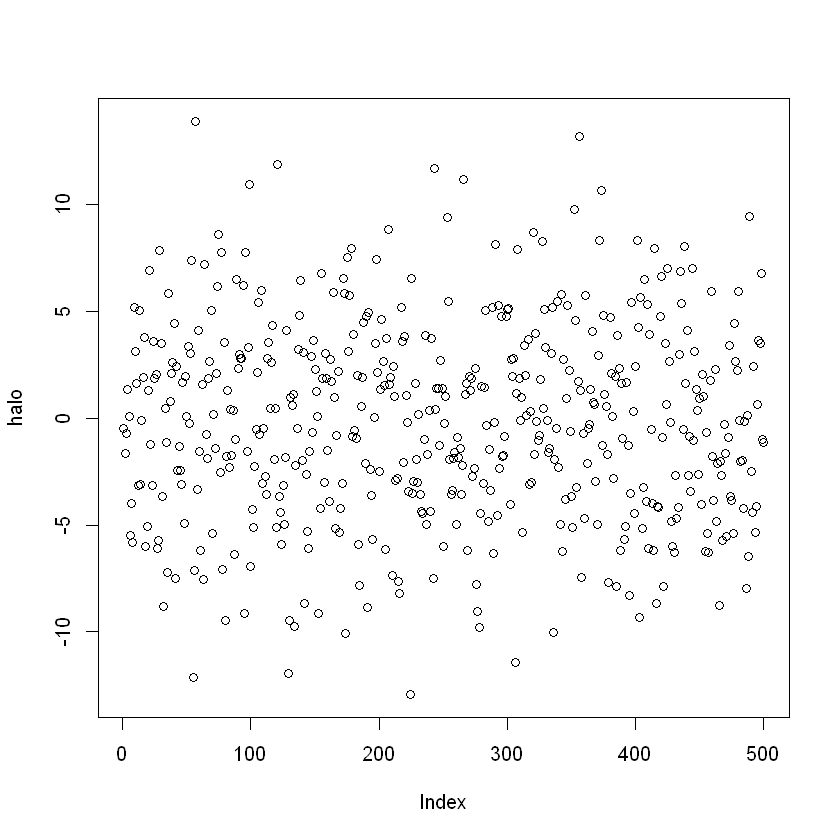

In [22]:
halo = rnorm(n=nresp, 0, 5)
plot(halo)

We add a constant just to adjust the range slightly, and convert the continuous values
to integers using floor(). This gives us a final value for each satisfaction item on
a 100-point scale.
- Although scales rating 1–5, 1–7, or 1–11 may be more common in practice, such discrete scales introduce complications that we discuss in 7.9; those would detract from our presentation here. So we assume that the data comes from a 100-point scale. Such near-continuous values might be obtained by measuring where respondents mark levels of satisfaction along a line on paper or by touching
a screen.

In [23]:
rides = floor(halo + rnorm(n=nresp, mean=80, sd=3)+1)
games = floor(halo + rnorm(n=nresp, mean=70, sd=7)+5)
wait  = floor(halo + rnorm(n=nresp, mean=65, sd=10)+9)
clean = floor(halo + rnorm(n=nresp, mean=85, sd=2)+1)

> By adding halo to the response for each question, we create positive correlation
between the responses. The constants +1, +5, and +9 are arbitrary to adjust the
ranges just for appearance.

You can verify the correlation between variables that
share the halo by using cor():

In [24]:
cor(rides, games)

[1] 0.4534134

Satisfaction surveys often include other questions related to the customer experience.
- For the amusement park data, we include whether the visit was on a weekend,
how far the customer traveled to the park in miles, and the number of children in
the party. We generate this data using two functions: rlnorm(n, meanlog,
sdlog) to sample a lognormal distribution for distance, and sample(x,
size, replace) to sample discrete distributions for weekend and number of
children (num.child):

In [25]:
distance  = rlnorm(nresp, 3, 1)
num.child = sample(x=0:5, size=nresp, replace=T, 
                   prob=c(0.3, 0.15, 0.25, 0.15, 0.1, 0.05))
weekend   = as.factor(sample(x=c('yes', 'no'), size=nresp, replace=T, 
                             prob=c(0.5,0.5)))

We create the overall satisfaction rating as a function of ratings for the various aspects
of the visit (satisfaction with rides, cleanliness, and so forth), distance traveled,
and the number of children:

In [26]:
overall = floor(halo + 0.5*rides + 0.1*games + 0.3*wait + 0.2*clean + 
                0.03*distance + 5*(num.child==0) +0.3*wait*(num.child>0) + 
                rnorm(nresp, 0, 7) -51)

> When a variable like overall is a linear combination of other variables plus random
noise, we say that it follows a linear model.

Before proceeding, we combine the data points into a data frame and remove unneeded
objects from the workspace:

In [27]:
sat.df = data.frame(weekend, num.child, distance, rides, games, wait, 
                    clean, overall)

In [29]:
rm(nresp, weekend, distance, num.child, halo, rides, games, wait, clean,overall)

## 7.2 Fitting Linear Models with lm()

In [30]:
summary(sat.df)

 weekend     num.child        distance            rides           games      
 no :259   Min.   :0.000   Min.   :  0.5267   Min.   :67.00   Min.   :52.00  
 yes:241   1st Qu.:0.000   1st Qu.: 10.3181   1st Qu.:77.00   1st Qu.:68.00  
           Median :2.000   Median : 19.0191   Median :80.00   Median :74.00  
           Mean   :1.738   Mean   : 31.0475   Mean   :80.38   Mean   :74.14  
           3rd Qu.:3.000   3rd Qu.: 39.5821   3rd Qu.:84.00   3rd Qu.:80.00  
           Max.   :5.000   Max.   :239.1921   Max.   :94.00   Max.   :96.00  
      wait            clean          overall      
 Min.   : 43.00   Min.   :72.00   Min.   :  6.00  
 1st Qu.: 65.75   1st Qu.:82.00   1st Qu.: 41.00  
 Median : 74.00   Median :85.00   Median : 52.00  
 Mean   : 73.42   Mean   :85.39   Mean   : 52.86  
 3rd Qu.: 81.00   3rd Qu.:89.00   3rd Qu.: 63.00  
 Max.   :103.00   Max.   :98.00   Max.   :102.00  

In [31]:
str(sat.df)

'data.frame':	500 obs. of  8 variables:
 $ weekend  : Factor w/ 2 levels "no","yes": 2 2 1 2 1 1 2 1 1 2 ...
 $ num.child: int  0 2 1 0 4 5 1 0 0 3 ...
 $ distance : num  114.6 27 63.3 25.9 54.7 ...
 $ rides    : num  82 82 79 82 78 76 72 77 84 82 ...
 $ games    : num  68 73 75 68 83 75 69 65 83 81 ...
 $ wait     : num  64 80 74 69 78 51 62 74 82 58 ...
 $ clean    : num  86 84 86 87 84 77 83 80 92 85 ...
 $ overall  : num  49 67 63 37 69 29 43 31 58 37 ...


> The data comprise eight variables from a survey of satisfaction with a recent visit to
an amusement park. The first three variables describe features of the visit: weekend
is a factor with two levels, no and yes; num.child is the number of children in
the party, 0–5; and distance is the distance traveled to the park.

>The remaining
five variables are satisfaction ratings for the customers’ experience of the rides,
games, wait times, cleanliness, and overall experience of the park, on a 100 point
scale.

### 7.2.1 Preliminary Data Inspection

We do an initial check of the variable distributions and relationships in sat.df
using gpairs() as described in Sect. 4.4.2:

In [33]:
library(grid)
library(lattice)

Warning message:
"package 'lattice' was built under R version 3.4.4"

In [35]:
library(gpairs)

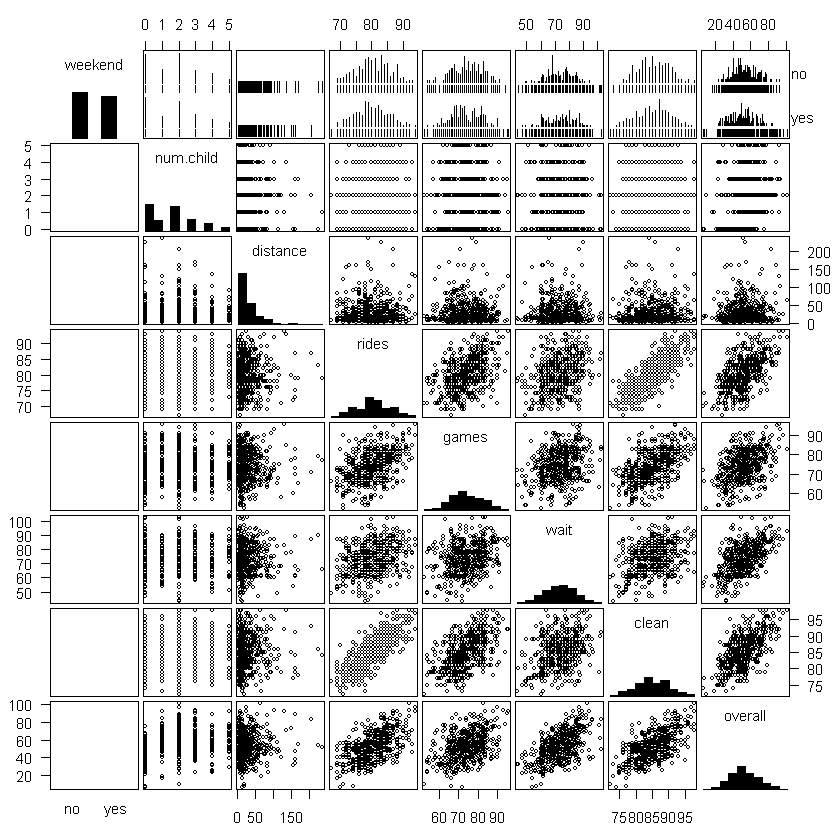

In [36]:
gpairs(sat.df)

> Fig. 7.1. An inspection of data using gpairs() before we perform further modeling. This
reveals that distance has a highly skewed distribution and should be transformed before
modeling. Additionally, several variables are positively associated and should be examined
further for the strength of association.

For most purposes it is a good idea to transform such a variable to a more
normal distribution. As we discussed in Sect. 4.5.4, a common transformation for
such data is a logarithmic transform; we take the log() of distance and add
that to the data frame:

In [38]:
sat.df$logdist <- log(sat.df$distance)

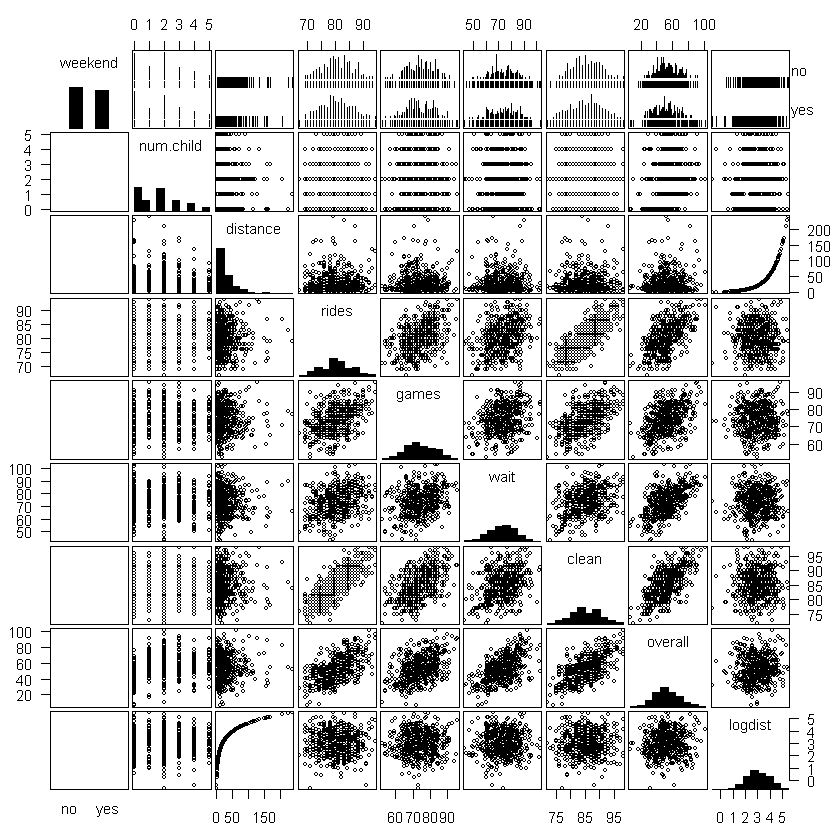

In [39]:
gpairs(sat.df)

> We could then run gpairs(sat.df) again (or run hist(sat.df$logdist))
to confirm that the new variable logdist is more normally distributed.

> They show few concerns apart from the need to transform
distance. For example, the pairwise scatterplots of our continuous measures are
generally elliptical in shape, which is a good indication that they are appropriate to
use in a linear model. 
 - One question, however, concerns the fact that the variables in the lower right of Fig. 7.1 are positively correlated. Why is this a concern? A common issue with marketing data and especially satisfaction
surveys is that variables may be ***highly correlated with one another.***
 - They may instead form an overall halo rating and rate individual elements of the experience in light of that overall feeling.
 - The effect can be so severe that ***the relationships become uninterpretable*** without taking some action to
handle the high correlations.

In [41]:
library(corrplot)

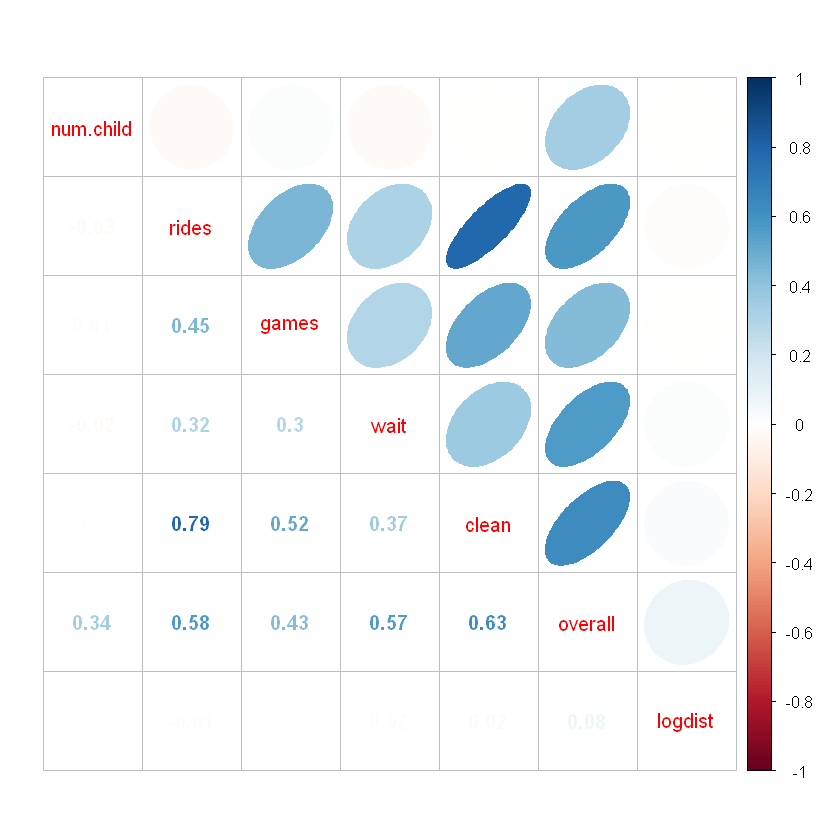

In [42]:
corrplot.mixed(cor(sat.df[ , c(2, 4:9)]), upper="ellipse")

> Fig. 7.2. A correlation plot for the amusement
park data. We selected columns c(2, 4:9) to exclude the categorical variable weekend
and the raw variable distance that we transformed as logdist.

>Inspection of the item
associations is always recommended before
linear modeling, in order to check
for extremely high correlations between
items (such as r > 0.9). In the present
data, rides and clean are highly related
(r = 0.79) but not so strongly that
remediation is strictly required. 

### 7.2.2 Recap: Bivariate Association

The goal of a satisfaction drivers analysis is to discover relationships between customers’
satisfaction with features of the service (or product) and their overall experience.
- For example, to what extent is satisfaction with the park’s rides related to
overall experience? Is the relationship strong or weak? One way to assess this is to
plot those two variables against each other as we did in Chap. 4:

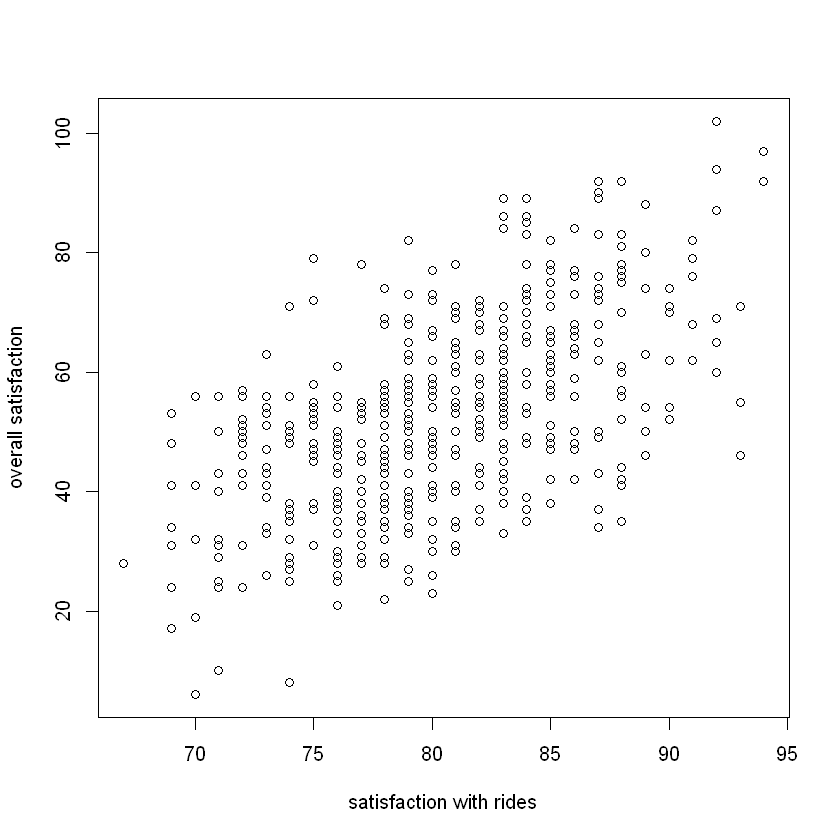

In [49]:
plot(overall ~ rides, data=sat.df, 
     xlab='satisfaction with rides', ylab='overall satisfaction')

> The points on the plot show that there is a
tendency for people with higher satisfaction with rides to also have higher overall
satisfaction.

### 7.2.3 Linear Model with a Single Predictor

A linear model estimates a best fit line through the cloud of points.
To estimate a linear model relating overall satisfaction to satisfaction
with rides, we write:

In [50]:
lm(overall ∼ rides, data=sat.df)


Call:
lm(formula = overall ~ rides, data = sat.df)

Coefficients:
(Intercept)        rides  
    -85.013        1.715  


### 7.2.4 lm Objects

Like most other R functions, lm() returns an object that we can save and use for
other purposes.

In [51]:
m1 <- lm(overall ∼ rides, data=sat.df)

We can then reuse the model by accessing m1. If we redraw the scatterplot for
overall ∼ rides, we can add the linear fit line using abline(m1):

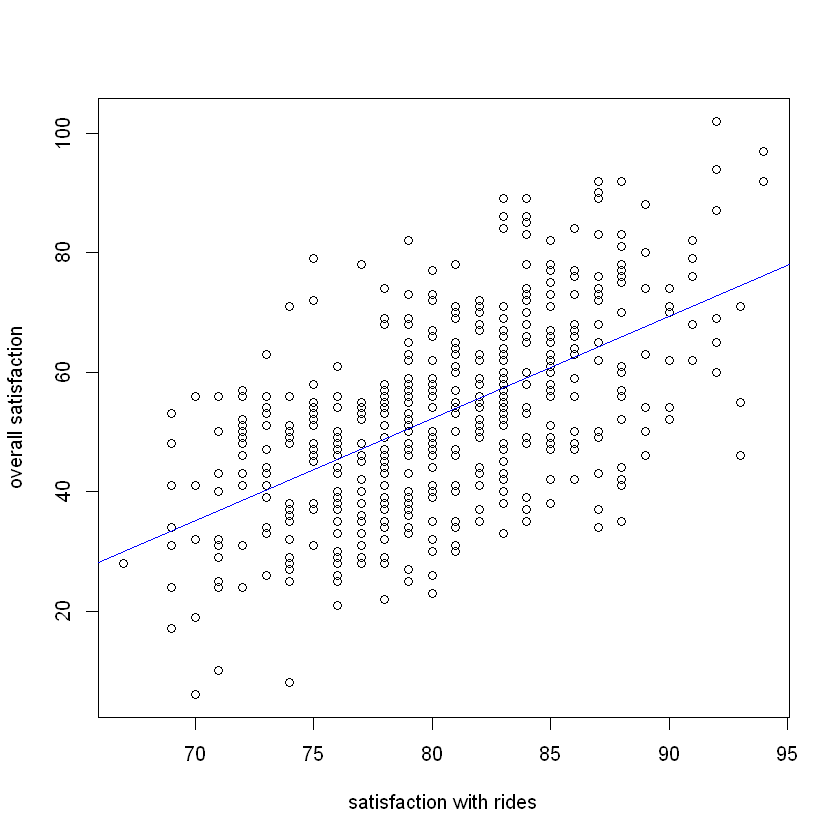

In [53]:
plot(overall ~ rides, data=sat.df, 
     xlab='satisfaction with rides', ylab='overall satisfaction')
abline(m1, col='blue')

In [54]:
str(m1)

List of 12
 $ coefficients : Named num [1:2] -85.01 1.72
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "rides"
 $ residuals    : Named num [1:500] -6.63 11.37 12.51 -18.63 20.23 ...
  ..- attr(*, "names")= chr [1:500] "1" "2" "3" "4" ...
 $ effects      : Named num [1:500] -1181.9 -207.5 12.9 -18.5 20.7 ...
  ..- attr(*, "names")= chr [1:500] "(Intercept)" "rides" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:500] 55.6 55.6 50.5 55.6 48.8 ...
  ..- attr(*, "names")= chr [1:500] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:500, 1:2] -22.3607 0.0447 0.0447 0.0447 0.0447 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:500] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "rides"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.04 1.01
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 498
 $ xlevels  

> This shows us that the m1 object is a list with 12 specific members that contain
everything lm() knows about the model. (To refresh yourself on list objects,
see Chap. 2.) The first element of this list is $coefficients, which you can
inspect:

In [55]:
m1$coefficients

(Intercept)       rides 
 -85.013187    1.715175

In [56]:
summary(m1)


Call:
lm(formula = overall ~ rides, data = sat.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.910 -10.131   0.657   8.693  35.375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -85.0132     8.7575  -9.707   <2e-16 ***
rides         1.7152     0.1087  15.779   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.15 on 498 degrees of freedom
Multiple R-squared:  0.3333,	Adjusted R-squared:  0.332 
F-statistic:   249 on 1 and 498 DF,  p-value: < 2.2e-16


> The most important section is labeled Coefficients and shows the model coefficients
in the Estimate column. 
 - The coefficient for rides is 1.70, so each additional
rating point for rides is estimated to result in an increase of 1.7 points of
overall rating. (In case you’re wondering, the coefficient for the (Intercept)
shows where the linear model line crosses the y-axis, but this is usually not interpretable
in a satisfaction drivers analysis—for instance, there is no such thing as
a possible negative rating on our scale—so it is generally ignored by marketing
analysts.)

> The Std. Error column indicates uncertainty in the coefficient estimate, under
the assumption that the data are a random sample of a larger population.
 - The “t value”, p-value (“Pr(>|t|)”), and significance codes indicate a Wald
test, which assesses whether the coefficient is significantly different than zero. A
traditional estimate of a 95% confidence interval for the coefficient estimate is
that it will fall within ±1.96×std.error. In this case, 1.7033±1.96×0.1055 =
(1.495,1.910). So we are confident—assuming the model is appropriate and the
data are representative—that the coefficient for ride is 1.495–1.910.

> The Residuals section in the summary(m1) output tells us how closely the
data follow the best fit line. 
 - A residual is the difference between the model-predicted
value of a point and its actual value. In Fig. 7.3, this is the vertical distance between
a plotted point (actual value) and the blue line (predicted value).
 - In the summary of m1, we see that the residuals are quite wide, ranging from
−33.597 to 34.699, which means our predictions can be quite a bit off for any given
data point (more than 30 points on the rating scale). The quartiles of the residuals
suggest that they are fairly symmetric around 0. As we discuss in Sect. 7.2.5, that is
a good sign that the model is unbiased (although perhaps imprecise).

> In the last section of the output, summary(m1) provides measures of how well
the model fits the data. The first is the residual standard error, an estimate of the standard error of the residuals. Like the residuals, this is a measure of how close the
data points are to the best estimate line. (You can directly check this by examining
the standard deviation of the residuals using sd, which will be similar.)

> The second line reports the estimate of R-squared, a measure of how much variation
in the dependent variable is captured by the model. 
 - In this case, the R-squared
is 0.3434, indicating that about a third of the variation in overall satisfaction is explained
by variation in satisfaction with rides. When a model includes only a single
predictor, R-squared is equal to the square of the correlation coefficient r between
the predictor and the outcome:

> Finally, the line labeled F-statistic: provides a statistical test of whether the
model predicts the data better than simply taking the average of the outcome variable
and using that as the single prediction for all the observations. In essence, this
test tells whether our model is better than a model that predicts overall satisfaction
using no predictors. (For reasons we will not describe in detail, this is the same test
reported by the anova() function that we saw in Chap. 5; you could find the same
value with anova(m1). Check a statistics textbook for a description of the F-test
in more detail.) 
- In the present case, the F-statistic shows a p-value << .05,
so we reject the null hypothesis that a model without predictors performs as well as
model m1.

Once again, R does not make you compute things by hand. confint() reports
confidence intervals:

In [58]:
confint(m1)

,2.5 %,97.5 %
(Intercept),-102.219442,-67.806933
rides,1.501602,1.928748


> This confirms our computation by hand that the best estimate for the relationship
overall ∼ rides is 1.496–1.911 (with slight differences due to rounding).
It is a best practice to report the range of an estimate, not just the single best
point.

### 7.2.5 Checking Model Fit

There are several assumptions when a linear model is fitted to data. The first is that
the relationship between the predictors and the outcomes is linear. If the relationship
is not linear, then the model will make systematic errors.
- For example, if we generate
data where y is a function of the square of x and then fit a linear model y ∼ x,
this will draw a straight line through a cloud of points that is curved.

In [63]:
x = rnorm(500)
y = x^2 + rnorm(500)
toy.model = lm(y ~ x)
summary(toy.model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6608 -1.0610 -0.2545  0.7747 10.1543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04618    0.07446  14.051   <2e-16 ***
x           -0.02943    0.07520  -0.391    0.696    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.664 on 498 degrees of freedom
Multiple R-squared:  0.0003075,	Adjusted R-squared:  -0.0017 
F-statistic: 0.1532 on 1 and 498 DF,  p-value: 0.6957


>If you inspect the model by typing summary(toy.model), you will see that
the fitted coefficient for x is −0.02943 and the Wald significance test indicates that
the coefficient is not significantly different from zero. Without model checking, a sloppy analyst might conclude that x is not related to y.

However, if we plot x
versus y and then draw our fitted line on the plot, we can see more clearly what is
going on.

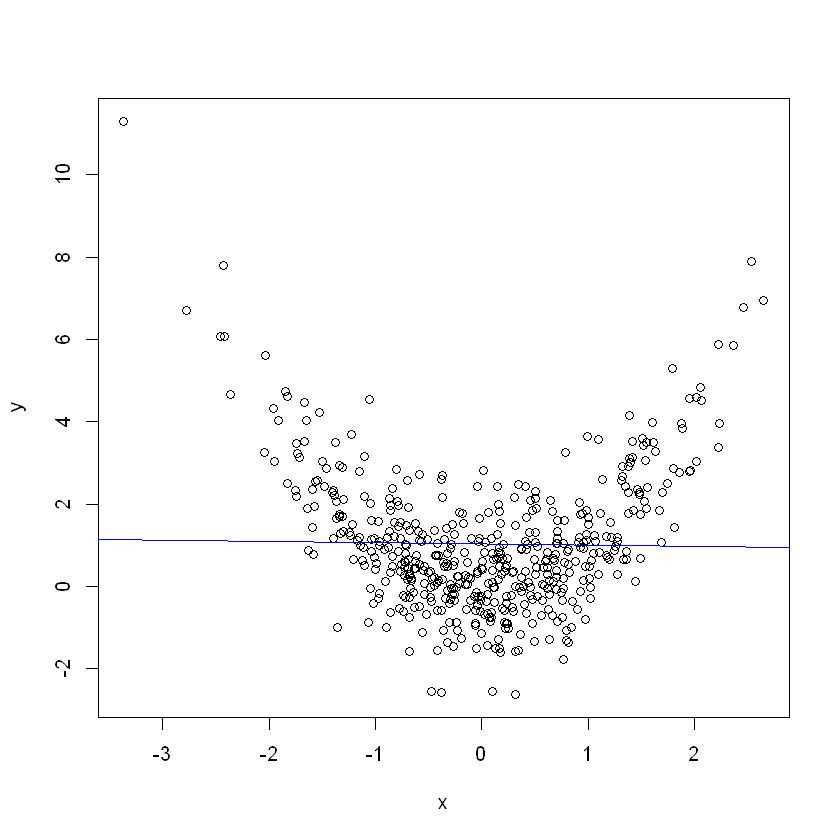

In [65]:
plot(y~x)
abline(toy.model, col='blue')

> The resulting plot is shown on the left side of Fig. 7.4. The plot shows that our fitted
linear model (illustrated with a blue line) completely misses the curvature in the
relationship between x and y.

Another assumption of a linear model is that prediction errors—the parts of the data
that do not exactly fit the model—are normally distributed and look like random
noise with no pattern. One way to examine this is to plot the model’s fitted values
(the predictions) versus the residuals (the prediction errors).

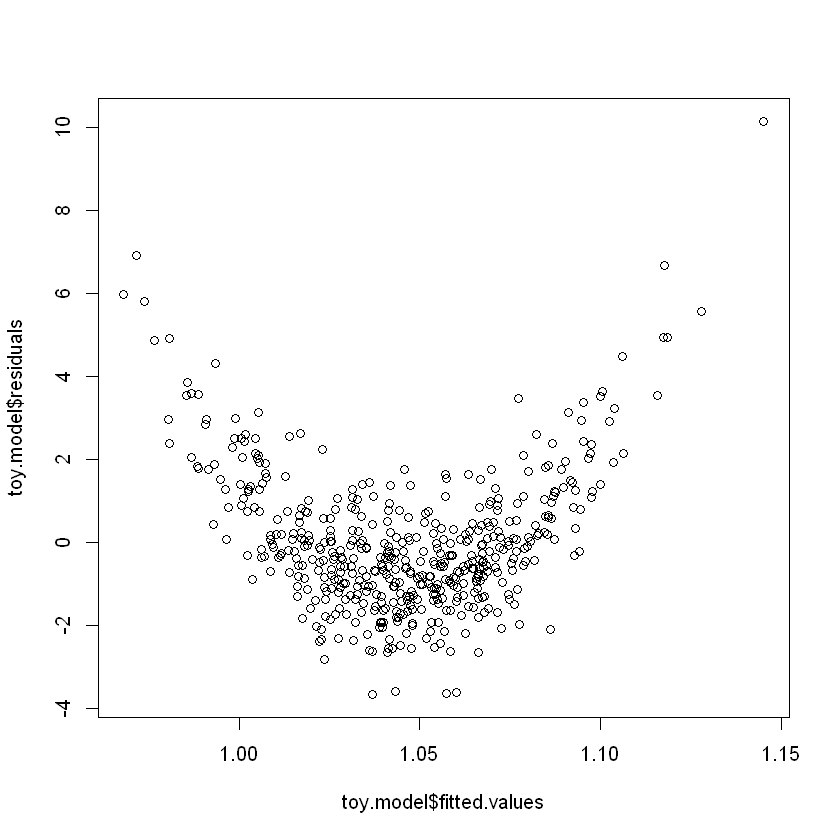

In [66]:
plot(toy.model$fitted.values, toy.model$residuals)

> This results in the plot on the right side of Fig. 7.4 and you can see from the plot
that there is a clear pattern in the residuals: our model under-predicts the value of
y near zero and over-predicts far from zero.

> When you come across this problem in
real data, the solution is usually to transform x; you can use the methods described
in Sect. 4.5.4 to find a transformation that is suitable. If you begin by inspecting
scatterplots as we recommend in Sect. 7.2.1, you will be unlikely to commit such
a simple error. Still, it is good to know that later checks can help prevent errors
as well

We can look at this same diagnostic plot for our satisfaction drivers data. R suggests
four specific plots to assess the fit of linear model objects and you can look at all
four simply by using plot() with any lm object. To see all four plots at once, we
type par(mfrow=c(2,2)) first:

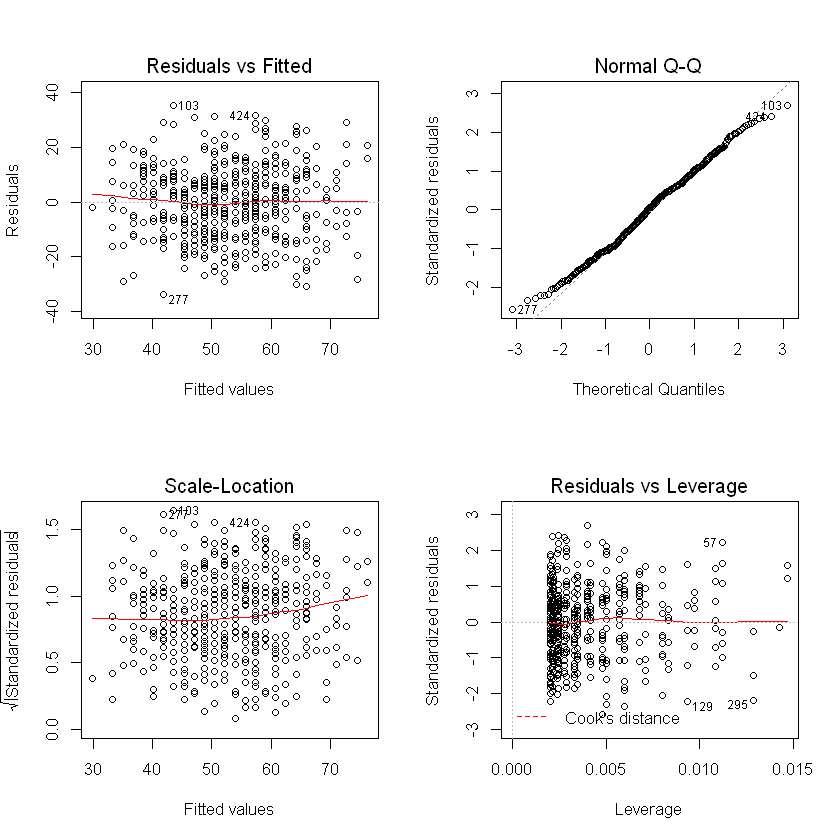

In [68]:
par(mfrow=c(2,2))
plot(m1)

> In Fig. 7.5, the first plot (in the upper left corner) shows the fitted values versus
residuals for m1, just as we produced manually for our toy y ∼ x model. In Fig. 7.5
there is no obvious pattern between the fitted values for overall satisfaction and the
residuals; this is consistent with the idea that the residuals are due to random error,
and supports the notion that the model is adequate.

>The second plot in the lower left of Fig. 7.5 is similar to the first, except that instead
of plotting the raw residual value, it plots the square root of the standardized
residual. Again, ***there should be no clear pattern; if there were it might indicate a
nonlinear relationship***. Observations with high residuals are flagged as potential outliers,
and R labels them with row numbers in case we wish to inspect them in the
data frame.

>A common pattern in residual plots is a cone or funnel, where the range of errors
gets progressively larger for larger fitted values. This is called ***heteroskedasticity*** and
is a violation of linear model assumptions. A linear model tries to maximize fit to
the line; when values in one part of the range have a much larger spread than those
in another area, they have undue influence on the estimation of the line. Sometimes
a transformation of the predictor or outcome variable will resolve heteroskedasticity
(see Sect. 4.5.3).

> The third result of plot() for lm objects is a Normal QQ plot, as in the upper right
of Fig. 7.5. A QQ plot helps you see whether the residuals follow a normal distribution,
another key assumption (see Sect. 3.4.3). It compares the values that residuals
would be expected to take if they are normally distributed, versus their actual values.
When the model is appropriate, these points are similar and fall close to a diagonal
line; when the relationship between the variables is nonlinear or otherwise does not
match the assumption, the points deviate from the diagonal line. In the present case,
the QQ plot suggests that the data fits the assumption of the model.

>The final plot in the lower right panel of Fig. 7.5 again helps to identify potential
outliers, observations that may come from a different distribution than the others.
Outliers are a problem because, if they are far from other points, they unduly influence
the fitted line. We do not want one or a very few observations to have a large
effect on the coefficients. The lower right plot in Fig. 7.5 plots the leverage of each
point, a measure of how much influence the point has on the model coefficients.
When a point has a high residual and high leverage, it indicates that the point has
both a different pattern (residual) and undue influence (leverage). One measure of
the leverage of a data point is Cook’s distance, an estimate of how much predicted
(y) values would change if the model were re-estimated with that point eliminated
from the data. If you have observations with high Cook’s distance, this chart would
show dotted lines for the distances; in the present case, there are none.

Still, in the lower right of Fig. 7.5, three points are automatically labeled with row
numbers because they are potentially problematic outliers based on high standardized
residual distance and leverage on the model. We do not recommend routinely yet we do recommend to inspect them and determine whether
there is a problem with the data.

In [70]:
sat.df[c(57, 129, 295),]

,weekend,num.child,distance,rides,games,wait,clean,overall,logdist
57,yes,2,63.29248,92,83,93,98,102,4.147767
129,yes,0,11.89550,70,72,54,74,6,2.476161
295,no,0,11.74474,93,78,67,89,46,2.463406


> In this case, none of the data points is obviously invalid (for instance, with values below
1 or greater than 100), although row 129 might be checked for input correctness;
an overall rating of 6 on the survey would be unusual although perhaps accurate.We
generally do not omit outliers except when they represent obvious errors in the data.
In the present case, we would keep all of the observations.

## 7.3 Fitting Linear Models with Multiple Predictors

Now that we’ve covered the basics of linear models using just one predictor, we
turn to the problem of assessing multiple drivers of satisfaction. Our goal is to sort
through all of the features of the park—rides, games, wait times, and cleanliness—to
determine which ones are most closely related to overall satisfaction.

In [71]:
m2 = lm(overall ∼ rides + games + wait + clean, data=sat.df)
summary(m2)


Call:
lm(formula = overall ~ rides + games + wait + clean, data = sat.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.094  -7.054   0.938   7.552  29.026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -125.16669    8.26913 -15.137  < 2e-16 ***
rides          0.53973    0.14761   3.656 0.000283 ***
games          0.16294    0.07119   2.289 0.022514 *  
wait           0.55688    0.04938  11.277  < 2e-16 ***
clean          0.95645    0.16402   5.831 9.94e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.92 on 495 degrees of freedom
Multiple R-squared:  0.5428,	Adjusted R-squared:  0.5391 
F-statistic: 146.9 on 4 and 495 DF,  p-value: < 2.2e-16


> Looking first at the model fit statistics at the bottom of the output, we see that our
prediction was improved by including all the satisfaction items in the model. The
R-squared increased to 0.5428, meaning that about half of the variation in overall
ratings is explained by the ratings for specific features.

> The residual standard error
is now 10.92, meaning that the predictions are more accurate. Our residuals also
appear to be symmetric. As noted above, we recommend also to inspect the model
using plot() to confirm that there are no patterns in the residuals indicative of
nonlinearity or outliers, although we omit that step here.

Next we examine the model coefficients. Each coefficient represents the strength
of the relationship between satisfaction with that feature and overall satisfaction,
conditional on the values of the other predictors.

In [72]:
library(coefplot) # install if necessary

Warning message:
"package 'coefplot' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"

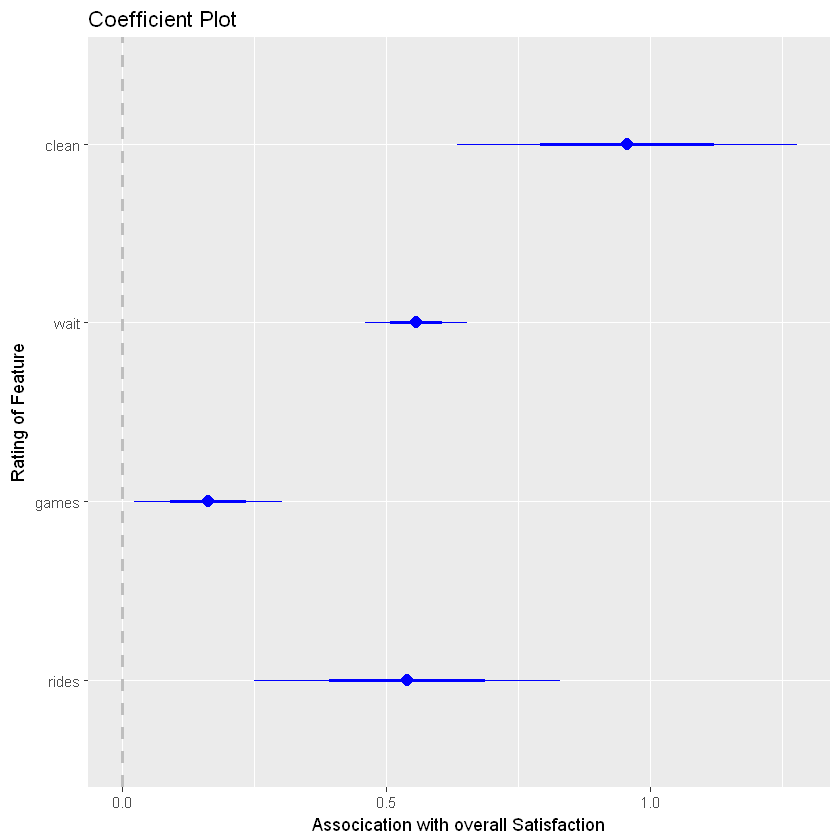

In [74]:
coefplot(m2, intercept=F, outerCI=1.96, lwdouter=1.5, 
         ylab='Rating of Feature', 
         xlab='Assocication with overall Satisfaction')

> We use coefplot() arguments to set the outer confidence interval to a width
of 1.96 standard errors (using outerCI=1.96, which corresponds to a 95%
confidence interval) and to increase the size of the plotted lines slightly with
lwdOuter=1.5.

> The result is shown in Fig. 7.6 where we see that satisfaction with cleanliness is estimated
to be the most important feature associated with overall satisfaction, followed
by satisfaction with the rides and wait times. Satisfaction with games is estimated
to be relatively less important.

### 7.3.1 Comparing Models

Now that we have two model objects, m1 and m2 we might ask which one is better.
One way to evaluate models is to compare their R-squared values.

In [77]:
summary(m1)$r.squared
summary(m2)$r.squared

[1] 0.3332999

[1] 0.5428225

> Based on the R-squared values we can say that m2 explains more of the variation in
satisfaction than m1.

However, a model with more predictors usually has a higher
R2, so we could instead compare adjusted R-squared values, which control for the
number of predictors in the model.

In [78]:
summary(m1)$adj.r.squared
summary(m2)$adj.r.squared

[1] 0.3319611

[1] 0.5391281

> The adjusted R-squared still suggests that the m2 explains more of the variation
in overall satisfaction, even accounting for the fact that m2 uses more
predictors.

To compare the predictions of the models visually, we plot the fitted versus actual
values for each:

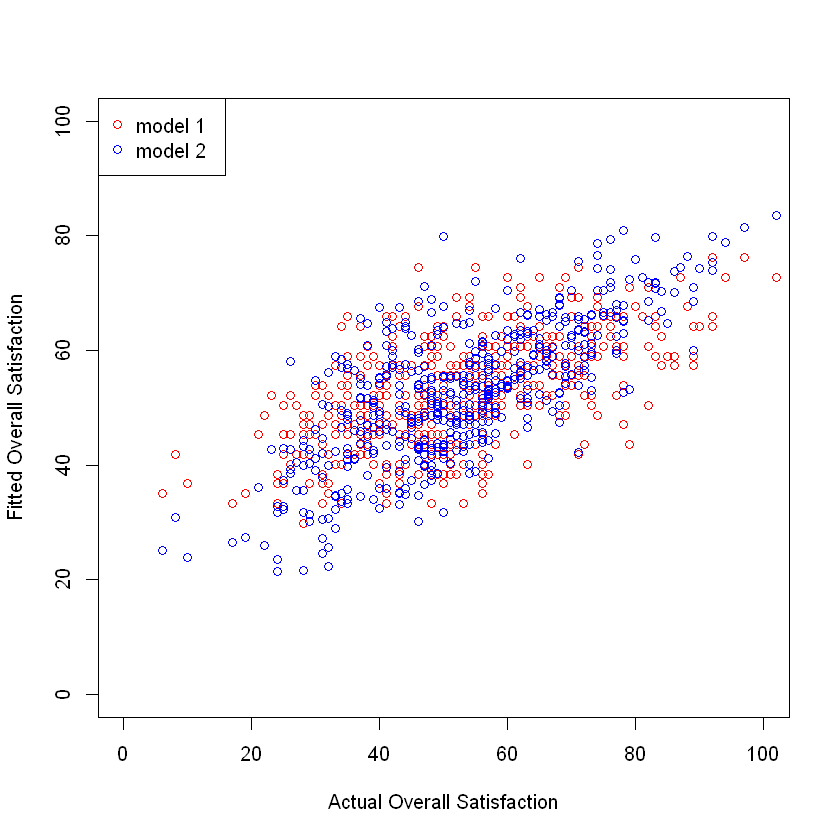

In [80]:
plot(sat.df$overall, fitted(m1), col='red', xlim=c(0,100), ylim=c(0,100), 
     xlab='Actual Overall Satisfaction', ylab='Fitted Overall Satisfaction')
points(sat.df$overall, fitted(m2), col='blue')
legend('topleft', legend=c('model 1', 'model 2'), col=c('red', 'blue'), pch=1)

> If the model fits the data perfectly, it would fall along a 45◦ line in this plot, but, of
course, it is nearly impossible to fit customer satisfaction data perfectly. By comparing
the red and the blue points in the resulting plot in Fig. 7.7, you can see that
the blue cloud of points is more tightly clustered along a diagonal line, which shows
that m2 explains more of the variation in the data than m1.

For a more formal test, which is possible because the models here are nested (see
Sect. 6.5.1), we can use anova() function to determine whether m2 explains more
of the variation than m1:

In [81]:
anova(m1, m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
498,86102.74,NA,NA,NA,NA
495,59043.39,3,27059.35,75.61883,2.809585e-40


> The low p-value indicates that the additional predictors in m2 significantly improve
the fit of the model. If these two models were the only ones under consideration, we
would interpret m2 instead of m1

#### Neither coefficient nor rides is more correct in itself because a coefficient is not right or wrong but part of a larger model. Which model is preferable? Because model m2 has better overall fit, we would interpret its coefficient for rides, but only in the context of the total model.

### 7.3.2 Using a Model to Make Predictions

We could use the model coefficients to predict
the overall outcome for different combinations of the explanatory variables.

In [84]:
coef(m2)['(Intercept)']+coef(m2)['rides']*100+coef(m2)['games']*100+
coef(m2)['wait']*100 + coef(m2)['clean']*100

(Intercept) 
   96.43333

One way is to use matrix operations to multiply coefficients
by a vector of predictor values:

In [85]:
coef(m2)%*%c(1, 100, 100, 100, 100)

96.43333


We could also use predict(object, newdata) where newdata is a data
frame with the same column names as the data that was used to estimate the model.

In [86]:
predict(m2, sat.df[1:10,])

1        2        3        4        5        6        7        8 
48.06609 55.87800 53.15632 51.80695 54.23474 30.12078 38.84865 44.70875 
       9       10 
67.35224 45.88656

> This predicts satisfaction for the first ten customers.

The predictions for observations
used to estimate the model are also stored in the model object, and can be accessed
with fitted()

In [87]:
fitted(m2)[1:10]

1        2        3        4        5        6        7        8 
48.06609 55.87800 53.15632 51.80695 54.23474 30.12078 38.84865 44.70875 
       9       10 
67.35224 45.88656

### 7.3.3 Standardizing the Predictors

If the variables have different
scales, such as a survey where rides is rated on a 1–10 scale while cleanliness is
rated 1–5 scale, then their coefficient values would not be directly comparable.

When you wish to compare coefficients, it can be helpful to standardize data on a
common scale before fitting a model (and after transforming any variables to a more
normal scale).
 - The most common standardization converts values to*** zero-centered
units of standard deviation***. This subtracts a variable’s mean from each observation
and then divides by the standard deviation (sd()). This could be done using math,
such as:

In [92]:
head((sat.df$rides - mean(sat.df$rides)) / sd(sat.df$rides), 10)

[1]  0.2987971  0.2987971 -0.2552148  0.2987971 -0.4398855 -0.8092268
 [7] -1.5479093 -0.6245561  0.6681384  0.2987971

This process is so common that R includes the scale() function to perform
it:

In [91]:
head(scale(sat.df$rides), 10)

0.2987971
0.2987971
-0.2552148
0.2987971
-0.4398855
-0.8092268
-1.5479093
-0.6245561
0.6681384
0.2987971


we create a scaled version of sat.df
called sat.std:

In [93]:
sat.std = sat.df[ , -3] # sat but remove distance
sat.std[ , 3:8] = scale(sat.std[ , 3:8])
head(sat.std)

weekend,num.child,rides,games,wait,clean,overall,logdist
yes,0,0.2987971,-0.7561865,-0.87575676,0.1184417,-0.2396868,1.7886823
yes,2,0.2987971,-0.1408004,0.61236008,-0.2711692,0.8791830,0.3226360
no,1,-0.2552148,0.1053541,0.05431626,0.1184417,0.6305453,1.1862757
yes,0,0.2987971,-0.7561865,-0.41072025,0.3132472,-0.9856000,0.2803106
no,4,-0.4398855,1.0899720,0.42634547,-0.2711692,1.0035019,1.0385034
no,5,-0.8092268,0.1053541,-2.08485169,-1.6348075,-1.4828754,0.1452467


> In this code, we first copied sat.df to the new data frame sat.std, dropping
the untransformed values of distance with [ , -3] because we use logdist
instead. Then we standardized each of the numeric columns. We do not standardize
weekend because it is a factor variable rather than numeric.We leave num.child
as is for now because we have not yet analyzed it.

After standardizing, you should check the results. A standardized variable should
have a mean of 0 and values within a few units of the mean. Checking the
summary():

In [94]:
summary(sat.std)

 weekend     num.child         rides              games         
 no :259   Min.   :0.000   Min.   :-2.47126   Min.   :-2.72542  
 yes:241   1st Qu.:0.000   1st Qu.:-0.62456   1st Qu.:-0.75619  
           Median :2.000   Median :-0.07054   Median :-0.01772  
           Mean   :1.738   Mean   : 0.00000   Mean   : 0.00000  
           3rd Qu.:3.000   3rd Qu.: 0.66814   3rd Qu.: 0.72074  
           Max.   :5.000   Max.   : 2.51484   Max.   : 2.68998  
      wait              clean             overall            logdist        
 Min.   :-2.82891   Min.   :-2.60883   Min.   :-2.91254   Min.   :-3.67074  
 1st Qu.:-0.71299   1st Qu.:-0.66078   1st Qu.:-0.73696   1st Qu.:-0.65352  
 Median : 0.05432   Median :-0.07636   Median :-0.05321   Median :-0.03327  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.70537   3rd Qu.: 0.70286   3rd Qu.: 0.63055   3rd Qu.: 0.71008  
 Max.   : 2.75153   Max.   : 2.45611   Max.   : 3.05476   Max.   : 2.53453  

There is a technical point we should mention when standardizing variables. If the
outcome and predictors are all standardized, their means will be zero and thus the
intercept will be zero. However, that does not imply that the intercept could be
removed from the model. The model is estimated to minimize error in the overall
fit, which includes error for the intercept. This implies that the intercept should
remain in a model after standardization if it would be there otherwise (as it usually
should be; see Sect. 7.5.1).

## 7.4 Using Factors as Predictors

For the next step, we wonder whether satisfaction is different for customers who
come on the weekend, travel farther, or have more children.We add these predictors
to the model using the standardized data:

In [97]:
m3 = lm(overall ~ rides + games + wait + clean + weekend + logdist + 
                  num.child, data=sat.std)
summary(m3)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + num.child, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59719 -0.40353  0.02127  0.41037  1.69667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.39256    0.04673  -8.400 4.82e-16 ***
rides        0.20617    0.04209   4.899 1.31e-06 ***
games        0.07229    0.03040   2.378   0.0178 *  
wait         0.37979    0.02791  13.609  < 2e-16 ***
clean        0.28902    0.04429   6.525 1.69e-10 ***
weekendyes  -0.04800    0.05165  -0.929   0.3531    
logdist      0.06420    0.02584   2.484   0.0133 *  
num.child    0.23918    0.01719  13.914  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5737 on 492 degrees of freedom
Multiple R-squared:  0.6754,	Adjusted R-squared:  0.6708 
F-statistic: 146.3 on 7 and 492 DF,  p-value: < 2.2e-16


> The model summary shows a substantial improvement in fit (R-squared of 0.6786)
and the coefficients for logdist and num.child are significantly greater than
zero, suggesting that people who travel further and have more children have higher
overall satisfaction ratings.

> Notice that the coefficient for weekend is labeled weekendyes, which seems a
bit unusual. Recall that weekend is a factor variable, but a factor doesn’t fit naturally
in our linear model; you can’t multiply yes by a number.
 - R handles this by converting the data to a numeric value where 1 is assigned to the value of yes and 0 to no. It labels the output so that we know which direction the coefficient applies to.
 - So, we can interpret the coefficient as meaning that on average those who come on
the weekend rate their overall satisfaction −0.048 standard units (standard deviations)
lower than those who come on a weekday.

When your data includes factors, you must be careful about the data type. 
 - For example,
num.child is a numeric variable, ranging 0–5, but it doesn’t necessarily
make sense to treat it as a number, as we did in m3. In doing so, we implicitly assume
that satisfaction goes up or down linearly as a function of the number of children,
and that the effect is the same for each additional child.

We correct this by converting num.child to a factor and re-estimating the
model:

In [99]:
sat.std$num.child.factor = factor(sat.std$num.child)
m4 = lm(overall ∼ rides + games + wait + clean + weekend + logdist + 
                  num.child.factor, data=sat.std)
summary(m4)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + num.child.factor, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24789 -0.32694 -0.00731  0.31878  1.50670 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.72558    0.04429 -16.383  < 2e-16 ***
rides              0.22159    0.03489   6.351 4.91e-10 ***
games              0.04378    0.02517   1.740   0.0826 .  
wait               0.38332    0.02308  16.607  < 2e-16 ***
clean              0.29639    0.03668   8.080 5.11e-15 ***
weekendyes        -0.02307    0.04265  -0.541   0.5888    
logdist            0.03002    0.02144   1.400   0.1621    
num.child.factor1  1.06476    0.07036  15.134  < 2e-16 ***
num.child.factor2  1.08735    0.05565  19.540  < 2e-16 ***
num.child.factor3  1.02900    0.06933  14.841  < 2e-16 ***
num.child.factor4  0.98543    0.07928  12.429  < 2e-16 ***
num.child.factor5  1.05185    0.10234  10.278  < 2e-1

> We now see that there are five fitted coefficients for num.child.factor: one
for parties with one child, one for parties with two children, etc. There is not a coefficient for num.child.factor0, because it is the baseline level to which
the other coefficients are added when they apply. 

> We interpret each coefficient as the difference between that level of the factor and the baseline level. So, parties with 1 child rate their overall satisfaction on average 1.06476 standard deviations higher
than parties without children.
- Internally, R has created a new variable num.child.factor1 that is equal to 1
for those cases where num.child.factor represents one child (a factor level of
“1”), and is 0 otherwise. Similarly, num.child.factor2 is 1 for cases with two
children, and 0 otherwise, and so forth. The coefficient for num.child.factor2
is 1.08735, meaning that people with two children rate their overall satisfaction on
average a full standard deviation higher than those with no children.

> A striking thing about m4 is that the increase in overall satisfaction is about the
same regardless of how many children there are in the party—about one standard
deviation higher for any number of children. 
 - This suggests that we don’t actually
need to estimate a different increase for each number of children. In fact, if the
increase is the same for one child as for five children, attempting to fit a model that
scales increasingly per child would result in a less accurate estimate.

Instead, we declare a new variable called has.child that is TRUE when the party
has children in it and FALSE when the party does not have children. We then
estimate the model using that new factor variable.We also drop weekend from the
model because it doesn’t seem to be a significant predictor:

In [100]:
sat.std$has.child = factor(sat.std$num.child > 0)
m5 = lm(overall ∼ rides + games + wait + clean + logdist + has.child,
                  data=sat.std)
summary(m5)


Call:
lm(formula = overall ~ rides + games + wait + clean + logdist + 
    has.child, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25789 -0.33632 -0.00457  0.33153  1.44988 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.73693    0.03856 -19.113  < 2e-16 ***
rides          0.22074    0.03461   6.378 4.14e-10 ***
games          0.04517    0.02506   1.803    0.072 .  
wait           0.38441    0.02296  16.745  < 2e-16 ***
clean          0.29650    0.03643   8.139 3.27e-15 ***
logdist        0.03323    0.02120   1.567    0.118    
has.childTRUE  1.05577    0.04622  22.841  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.472 on 493 degrees of freedom
Multiple R-squared:  0.7799,	Adjusted R-squared:  0.7772 
F-statistic: 291.1 on 6 and 493 DF,  p-value: < 2.2e-16


> The change in R-squared between model m4 and
m5 is negligible, suggesting that our simplification did not deteriorate the
model fit.

> Model m5 estimates overall satisfaction to be about one standard deviation higher
for parties with children. However, one might now wonder how children influence
other aspects of the ratings. 
 - For instance, is the relationship between satisfaction
and waiting times different for parties with and without children? One might guess
from experience that wait time would be more important to parties with children. To
explore this question, we need to incorporate ***interactions*** into the model.

## 7.5 Interaction Terms

We can include an interaction of two terms by using the **:** operator between variables
in a formula.

We create a new model with interactions between the satisfaction ratings and two
variables that describe the visit: no.child and weekend:

In [104]:
m6 = lm(overall~rides + games + wait + clean + weekend + logdist + 
                has.child + rides:has.child + games:has.child +wait:has.child+  
                clean:has.child + rides:weekend + games:weekend +wait:weekend+  
                clean:weekend, data=sat.std)
summary(m6)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + has.child + rides:has.child + games:has.child + 
    wait:has.child + clean:has.child + rides:weekend + games:weekend + 
    wait:weekend + clean:weekend, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20261 -0.30320  0.00773  0.29361  1.45689 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.713325   0.042449 -16.804  < 2e-16 ***
rides                0.148643   0.067163   2.213 0.027351 *  
games                0.078536   0.048690   1.613 0.107400    
wait                 0.132495   0.043805   3.025 0.002621 ** 
clean                0.295242   0.078623   3.755 0.000194 ***
weekendyes          -0.020619   0.040716  -0.506 0.612804    
logdist              0.024894   0.020425   1.219 0.223508    
has.childTRUE        1.046062   0.044278  23.625  < 2e-16 ***
rides:has.childTRUE  0.055652   0.072014   0.773 0.440021    
game

> The model object m6 now includes eight interaction terms between ratings for features
of the park and no.child and weekend. Only one of these interactions
is significant: the wait:no.child interaction
 - This suggests we could drop the
non-significant interactions to create a new model m7:

In [106]:
m7 = lm(overall ~ rides + games + wait + clean + logdist + has.child + 
                  wait:has.child, data=sat.std)
summary(m7)


Call:
lm(formula = overall ~ rides + games + wait + clean + logdist + 
    has.child + wait:has.child, data = sat.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18307 -0.30375 -0.00022  0.32294  1.41932 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.72869    0.03639 -20.023  < 2e-16 ***
rides               0.21428    0.03267   6.560 1.37e-10 ***
games               0.04970    0.02365   2.102   0.0361 *  
wait                0.15195    0.03666   4.145 3.99e-05 ***
clean               0.28797    0.03439   8.374 5.84e-16 ***
logdist             0.02767    0.02002   1.382   0.1676    
has.childTRUE       1.04898    0.04362  24.047  < 2e-16 ***
wait:has.childTRUE  0.34105    0.04339   7.861 2.43e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4453 on 492 degrees of freedom
Multiple R-squared:  0.8045,	Adjusted R-squared:  0.8017 
F-statistic: 289.1 on 7 and 492 DF,  

> In these results, we see that attending the park with children is a predictor of higher
satisfaction, and ***waiting time is more important predictor among those with children (wait:has.childTRUE) than those without children***.We don’t know the reason
for this, but perhaps children go on more rides and their parents are therefore more
influenced by wait times.

There are many more such questions one could pose from results like these; a crucial
step in analysis is to think carefully about the implications and where one might
be able to make a product or market intervention. When considering actions to take,
it is especially important to remember that ***the model assesses association, not causation.***
Possible changes in outcome should be viewed as hypotheses suggested by
the model, to be confirmed separately.

In [108]:
library(coefplot)

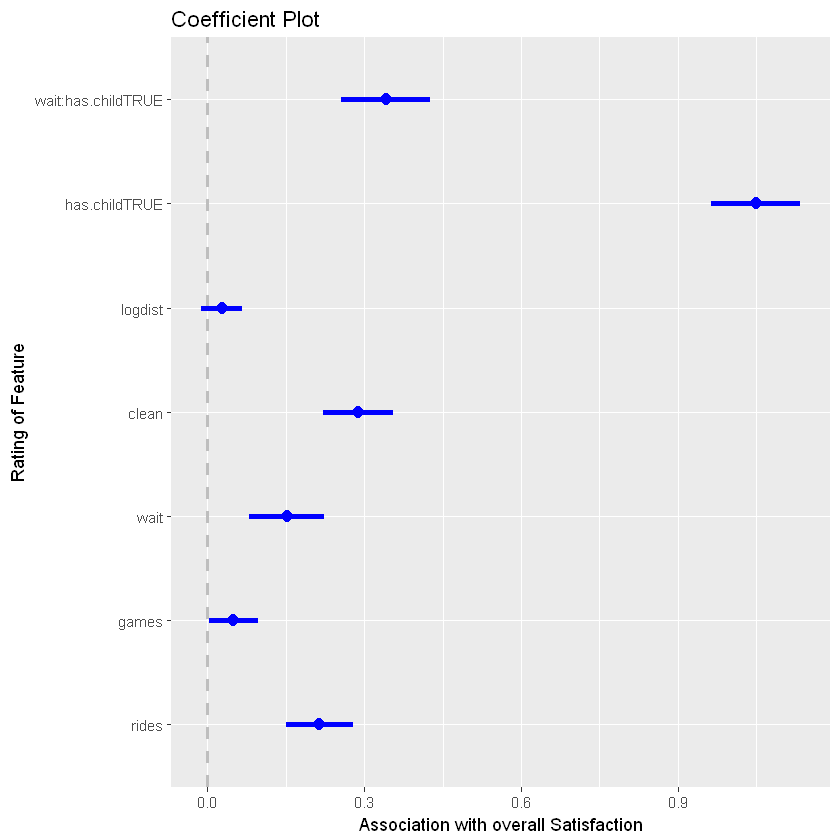

In [109]:
coefplot(m7, intercept=F, outerCI =1.96, lwdOuter=1.5, 
         ylab='Rating of Feature', xlab='Association with overall Satisfaction')

> Fig. 7.8. Satisfaction drivers for visitors to an amusement park (simulated). The model reveals
that the variable most strongly (and positively) associated with satisfaction is visiting the park
with children. Satisfaction with waiting time is a stronger predictor of overall satisfaction
among visitors with children than those without, as shown in the wait:has.childTRUE
interaction. Of the individual park features, satisfaction with cleanliness is most associated
with overall satisfaction.

### 7.5.1 Language Brief: Advanced Formula Syntax*

As we’ve seen, you can include an interaction between x and z by including x:z in
the formula. If you want to include two variables along with their interaction, you
can use x*z, which is the equivalent to writingx + z + x:z.

To include all of the predictors in your data frame in the model, use a . , writing
write y ∼ .. You can also omit any variable using -x. Thus, y ∼ . - xmeans
“include all the variables except x.”

## 7.6 Caution! Overfitting

Now that we’ve seen the complete process of creating a model, from initial data
inspection to the potential implications, we have a caution about linear models. As
you become more comfortable with linear models, you may want to put more and
more predictors into your equation. Be careful about that.

This process of adding too many variables and ending up with a less precise or inappropriate
model is called overfitting. 
 - One way to avoid it is to keep a close eye
on the standard errors for the coefficients; small standard errors are an indicator that
there is sufficient data to estimate the model. 
 - Another approach is to select a subset
of the data to hold out and not use to estimate the model. After fitting the model, use
predict() on the hold out data and see how well it performs. Overfitted models
will perform poorly when predicting outcomes for holdout data. 

Stepwise model selection is a traditional approach to select variables while attempting to avoid overfitting;
the step() function we saw in Sect. 6.5.3 works for lm objects the same
as for aov models.

We recommend to keep models as parsimonious as possible. Although it is tempting
to create large, impressive, omnibus models, it is usually more valuable in
marketing practice to identify a few interventions with clear and confident interpretations.

## 7.7 Recommended Procedure for Linear Model Fitting

We followed a lengthy process to arrive at the final model m7, and it is helpful to
recount the general steps we recommend in creating such a linear model.

1. Inspect the data to make sure it is clean and has the structure you expect, following
the outline in Sect. 3.3.3.

2. Check the distributions of the variables to make sure they are not highly skewed
(Sect. 7.2.1). If one is skewed, consider transforming it (Sect. 4.5.4).

3. Examine the bivariate scatterplots and correlation matrix (Sect. 7.2.1) to see
whether there are any extremely correlated variables (such as r > 0.9, or several
with r > 0.8). If so, omit some variables or consider transforming them if
needed; see Sect. 9.1 for further discussion.

4. If you wish to estimate coefficients on a consistent scale, standardize the data
with scale() (Sect. 7.3.3).

5. After fitting a model, check the residual quantiles in the output. The residuals
show how well the model accounts for the individual observations (Sect. 7.2.4).

6. Check the standard model plots using plot(), which will help you judge
whether a linear model is appropriate or whether there is nonlinearity, and will
identify potential outliers in the data (Sect. 7.2.4).

7. Try several models and compare them for overall interpretability and model fit
by inspecting the residuals’ spread and overall R2 (Sect. 7.3.1). If the models
are nested, you could also use anova() for comparison (Sect. 6.5.1) .

8. Report the confidence intervals of the estimates with your interpretation and
recommendations (Sect. 7.3).

# 7.8 Bayesian Linear Models with MCMCregress()*

In this section, we review how the satisfaction analysis could be performed with
Bayesian methods. The Bayesian method does this by ***sampling the posterior distribution of estimated
model parameters*** (Sect. 6.6.2), using a procedure known as Markov-chain Monte
Carlo (MCMC)
- The package MCMCpack includes MCMCregress(), which estimates Bayesian
linear models using samples from the posterior distribution; it makes a Bayesian
estimation of the model as easy as calling lm().

In [117]:
library(MCMCpack)

Warning message:
"package 'MCMCpack' was built under R version 3.4.4"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.4.4"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.4.4"##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2018 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


In [125]:
m7.bayes = MCMCregress(overall ~ rides + games + wait + clean + logdist +
                                 has.child + wait:has.child, data=sat.std)
summary(m7.bayes)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                       Mean      SD  Naive SE Time-series SE
(Intercept)        -0.72884 0.03657 0.0003657      0.0003657
rides               0.21426 0.03304 0.0003304      0.0003256
games               0.04985 0.02371 0.0002371      0.0002371
wait                0.15196 0.03661 0.0003661      0.0003661
clean               0.28759 0.03468 0.0003468      0.0003468
logdist             0.02739 0.02005 0.0002005      0.0002005
has.childTRUE       1.04906 0.04386 0.0004386      0.0004386
wait:has.childTRUE  0.34149 0.04317 0.0004317      0.0004317
sigma2              0.19884 0.01274 0.0001274      0.0001274

2. Quantiles for each variable:

                        2.5%      25%      50%      75%   97.5%
(Intercept)        -0.798838 -0.75363 -0.72898 -0.70444 -0.6565
rides               0.148305 

> The important thing to understand is that MCMCregress()
has drawn 10,000 samples from the estimated distribution of possible coefficients
for model m7. It then describes those 10,000 sets of estimates in two ways: 
- using ***central tendency statistics*** (mean and standard deviation, in the output section labeled “1.”), 
- and again using distribution quantiles (in output section “2.”).

> There, we
saw that rides had an estimated coefficient of 0.21428; here, the mean of the
Bayesian estimates is 0.21426 and the median is 0.21455. Similarly, lm() estimated
wait:has.child as 0.34105; the mean Bayesian estimate is 0.34149 and the median
is  0.34129. The coefficients estimated by the classical and Bayesian models are
nearly identical.

> Despite the similar model coefficients, there are two notable differences between
this output and the output from lm(). 
 - First, it includes 2. Quantiles ...
because the Bayesian posterior distribution may be asymmetric; the distribution of
estimates could be skewed if that provided a better fit to the data.
 - Second, the Bayesian output does not include statistical tests or p-values; null
hypothesis tests are not emphasized in the Bayesian paradigm. Instead, to determine whether a parameter is likely to be non-zero (or to compare it to any
other value), check the 2.5 and 97.5 %’iles and directly interpret the credible interval.
   * For instance, in the quantiles above, the 2.5–97.5 %’iles for logdist range
(−0.01092,0.06869) and we conclude that the coefficient for logdist is not credibly
different from 0 at a level of 95% confidence. However, all of the other coefficients
are different from zero.

If the Bayesian estimates are so similar to those from lm(), what is the advantage?
The results here are similar for two reasons. 
 - First, we have plenty of data and a
well-behaved model. 
 - Second, classical methods such as lm() are eminently suited
to estimation of linear models. In Chap. 9 we examine hierarchical Bayesian models,
in which more advantages of the Bayesian approach emerge; we later continue that
investigation with choice models in Chap. 13.

We also believe, as noted in Sect. 6.6.1, that inferences such as hypothesis testing
are clearer and more interpretable in the Bayesian approach. In fitting models, it is
not always the case that classical and Bayesian estimates are so similar, and when
they differ, we are ***more inclined to trust the Bayesian estimates.***